In [1]:
from basic_tools import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [3]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7622)

# Parsing result of partitioned LDSC

In [4]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [5]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [6]:
h2_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']/regression_result_list[-1]['h2'].sum()).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_bp8_df=h2_bp8_df.set_index(0)

In [7]:
h2_bp8_df.head()

,1,2,3,4,5,6,7,8,9,10,...,349,350,351,352,353,354,355,356,357,358
0,,,,,,,,,,,,,,,,,,,,,
50_irnt,0.002389,0.003608,0.006402,0.004015,0.003158,0.005561,0.002866,0.001747,0.001105,0.001565,...,0.000322,0.001021,0.003939,0.001680,0.000107,0.002109,0.001767,0.003153,0.003943,0.000266
20153_irnt,0.002696,0.005032,0.008558,0.003990,0.003221,0.005905,0.003519,0.001807,0.000196,0.001665,...,-0.000613,0.000924,0.003188,0.001374,0.000093,0.002646,0.002182,0.002971,0.002183,-0.000182
5097_irnt,0.005927,0.003488,0.007695,0.001749,0.008921,0.000793,0.004431,0.007008,0.001601,0.002895,...,-0.001205,0.002762,0.006069,0.016349,0.001629,0.006375,0.003519,0.003103,0.005915,0.000385
5098_irnt,0.005414,0.004066,0.006285,0.000448,0.010740,0.001084,0.004246,0.006274,0.002411,0.003021,...,-0.001897,0.001749,0.005336,0.016696,0.001424,0.005422,0.004009,0.002982,0.007849,0.000748
30100_irnt,0.004789,0.005512,0.000352,0.006246,0.000453,0.005522,0.001755,0.000519,0.000687,0.000277,...,0.001016,-0.000741,0.001143,0.000673,-0.000019,0.004854,0.002875,0.001307,0.005506,0.004889


# Clustering

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [8]:
pca_data=h2_bp8_df

pca = PCA(n_components=50)
pca_result=pca.fit_transform(pca_data)
pca_result = pd.DataFrame(pca_result,index=pca_data.index)

In [9]:
tsne_data=pca_result

tsne = TSNE(learning_rate=100,perplexity=4)
#tsne = TSNE(learning_rate=200)
tsne_result = pd.DataFrame(tsne.fit_transform(tsne_data),index=tsne_data.index)

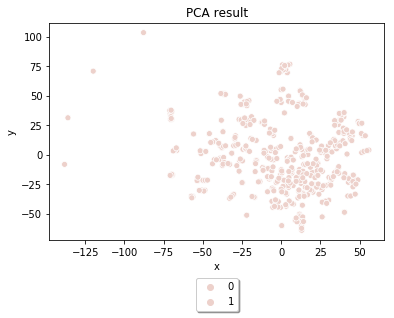

In [10]:
plot_data=tsne_result
x_data=plot_data[0]
y_data=plot_data[1]

#hue_data=[h2_total.loc[pheno_code]['uni.Total Liability scale h2'] for  pheno_code in pheno_code_list]
#hue_data=[corr_with_dummy_cm_dict['snp'].loc[pheno_code]['cm8'] for  pheno_code in toplot.index]
hue_data=1

plt.title("PCA result")
sns.scatterplot(x_data,y_data,hue=hue_data)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)


plt.show()

In [11]:
dbscan=DBSCAN(eps=3, min_samples=2)
dbscan_result=dbscan.fit(tsne_result)

In [12]:
plot_data=tsne_result.copy()
plot_data.columns=['x_data','y_data']
plot_data['label']=dbscan_result.labels_

In [15]:
description_dict_merge=pd.read_csv(description_dict_merge_path,sep='\t',index_col='description')

def description_to_short(desc,mode='pub',suffix="basic"):

    description_dict=description_dict_merge
    
    if not mode in ['ori','pub','abbr','abbr_pub','abbr_pub_ori']:
        raise    
    if desc in description_dict.index:
        if mode=='ori':
            return desc
        elif mode=='pub':
            #print(correlation_description_dict['description_pub'].loc['Tobacco smoking: Ex-smoker'],description_dict['description_pub'].loc['Tobacco smoking: Ex-smoker'])
            return description_dict['description_pub'+"_"+suffix].loc[desc]
        elif mode=='abbr':
            return description_dict['description_abbr'+"_"+suffix].loc[desc]
        elif mode=='abbr_pub':
            abbr=description_to_short(desc,mode='abbr',suffix=suffix)
            #print(description_to_short(desc,mode='pub',suffix=suffix))
            return description_to_short(desc,mode='pub',suffix=suffix) if type(abbr)==float or abbr=='' else abbr
        elif mode=='abbr_pub_ori':
            abbr_pub=description_to_short(desc,mode='abbr_pub',suffix=suffix)
            #print(abbr_pub)
            return desc if type(abbr_pub)==float or abbr_pub=='' else abbr_pub
    else:
        return np.nan


In [16]:
for idx in plot_data_filtered.index:
    print(idx,code_to_description(idx))
    
    print(description_to_short(code_to_description(idx),'abbr_pub',"basic"))

NameError: name 'plot_data_filtered' is not defined

In [17]:
#plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub',"basic"))

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


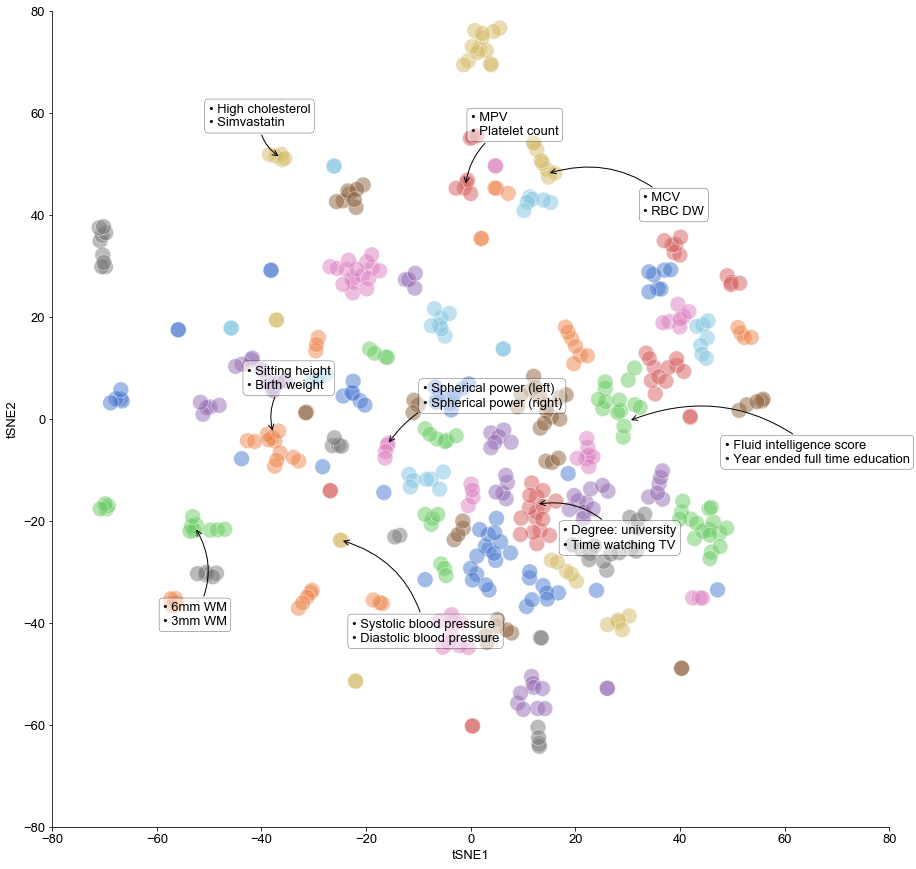

In [18]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['font.size']=13

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())


sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=250,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))),
                alpha=0.5
               )

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,25,5)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    plot_data_filtered['description_short']=plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub',"basic"))
    #print(index_shorten[~index_shorten.isnull()])
    plot_data_filtered=plot_data_filtered[~plot_data_filtered['description_short'].isnull()].iloc[:2]
    if plot_data_filtered.shape[0]<2:
        continue
    s=plot_data_filtered['description_short'].values
    s=['• '+i for i in s]
    s='\n'.join(s)
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        
        if abs(xytext[0])>60 or abs(xytext[1])>60:
            continue
        
        if text_plotted.shape[0]==0 or (((text_plotted['x']-xytext[0])**2+0.4*(text_plotted['y']-xytext[1])**2)<1000).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break

#plt.xticks([])
#plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.gca().axes.get_yaxis().set_visible(False)

plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
#plt.
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)
plt.title("")
plt.xlim(-80,80)
plt.ylim(-80,80)
sns.despine()

plt.show()


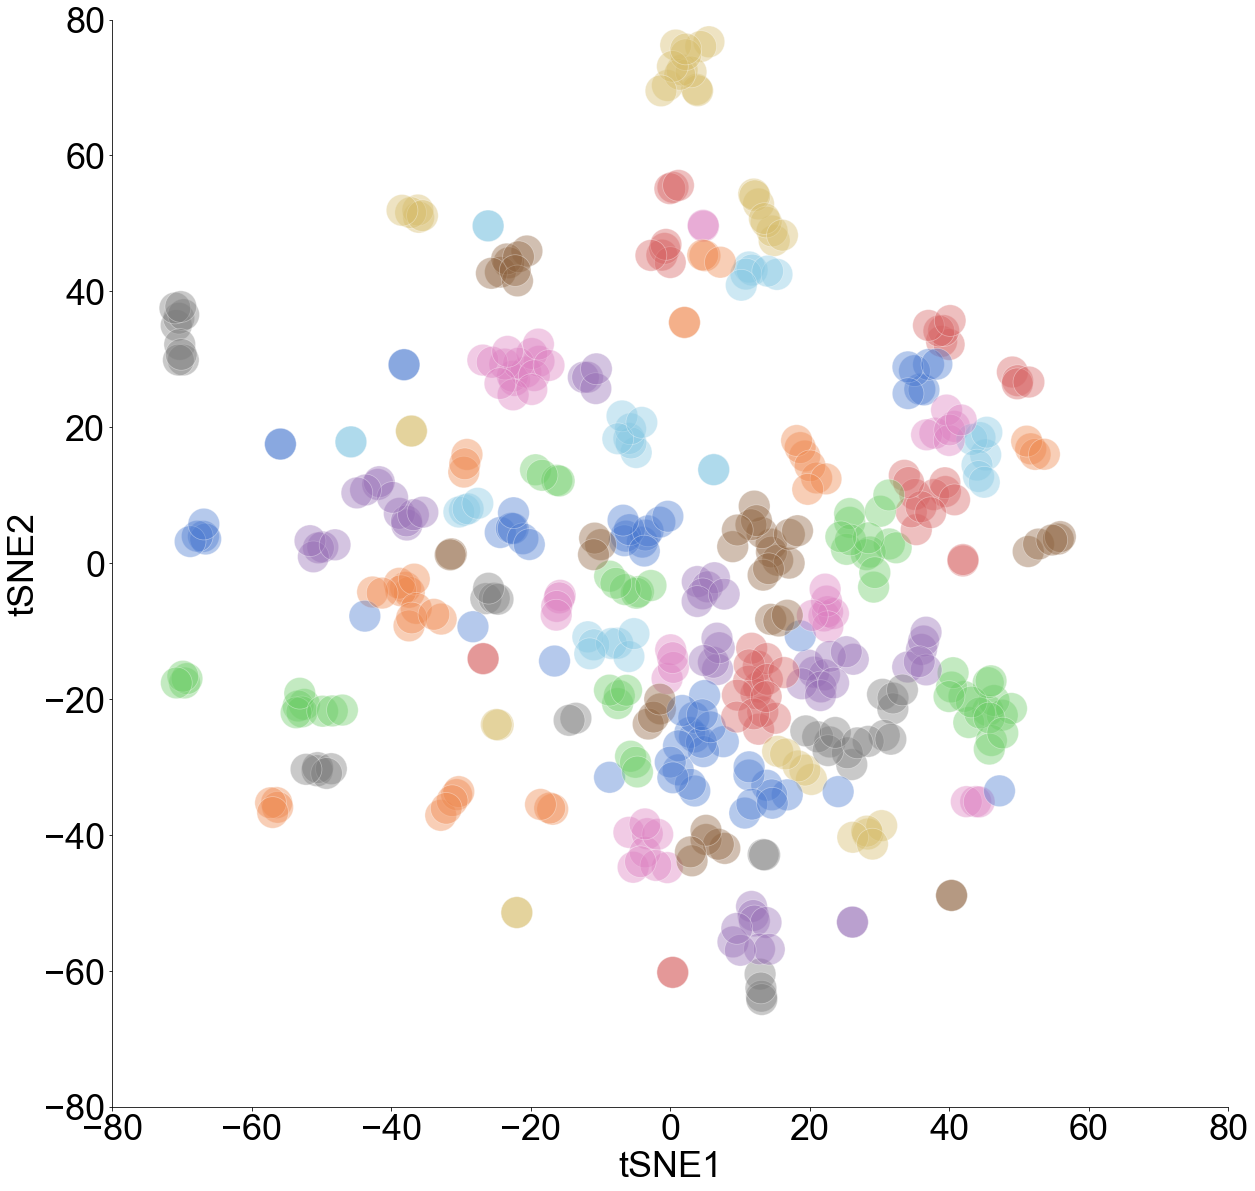

In [30]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.size']=36

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())


sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=1000,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))),
                alpha=0.4
               )

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,25,5)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])

#plt.xticks([])
#plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.gca().axes.get_yaxis().set_visible(False)

plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
#plt.
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)
plt.title("")
plt.xlim(-80,80)
plt.ylim(-80,80)
sns.despine()
plt.savefig('fig4_b_.svg')

plt.show()


/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


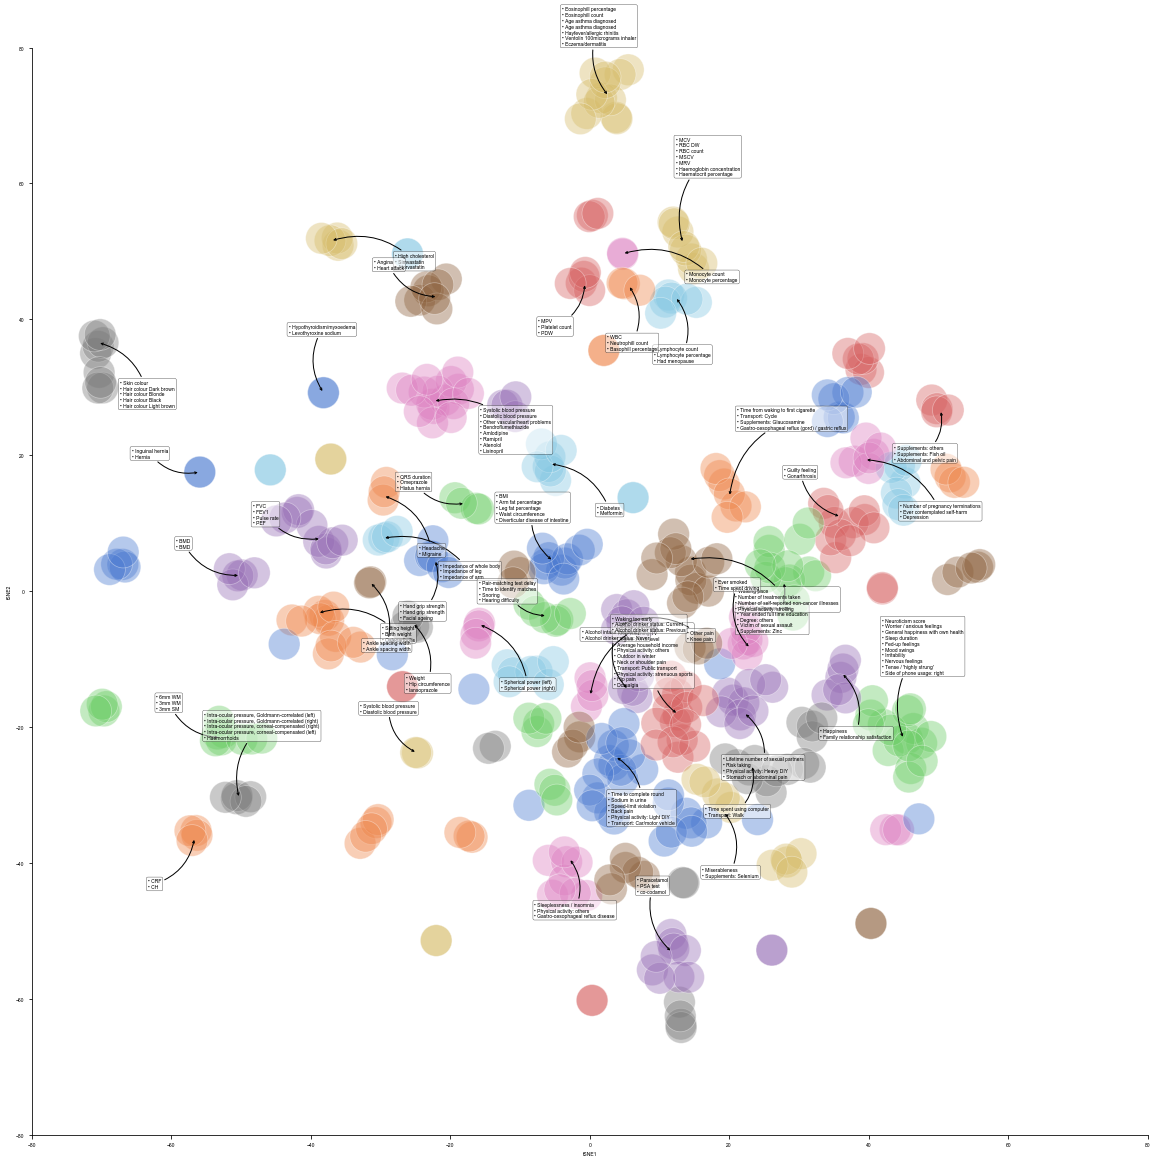

In [35]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.size']=5

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())


sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=1000,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))),
                alpha=0.4
               )

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,25,5)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])


for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    plot_data_filtered['description_short']=plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub',"basic"))
    #print(index_shorten[~index_shorten.isnull()])
    plot_data_filtered=plot_data_filtered[~plot_data_filtered['description_short'].isnull()]
    if plot_data_filtered.shape[0]<2:
        continue
    s=plot_data_filtered['description_short'].values
    s=['• '+i for i in s]
    s='\n'.join(s)
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    move=move_sample[0]
    xytext=xy+move
    
    plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))


plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
#plt.
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)
plt.title("")
plt.xlim(-80,80)
plt.ylim(-80,80)
sns.despine()
plt.savefig('fig4_b__.svg')

plt.show()







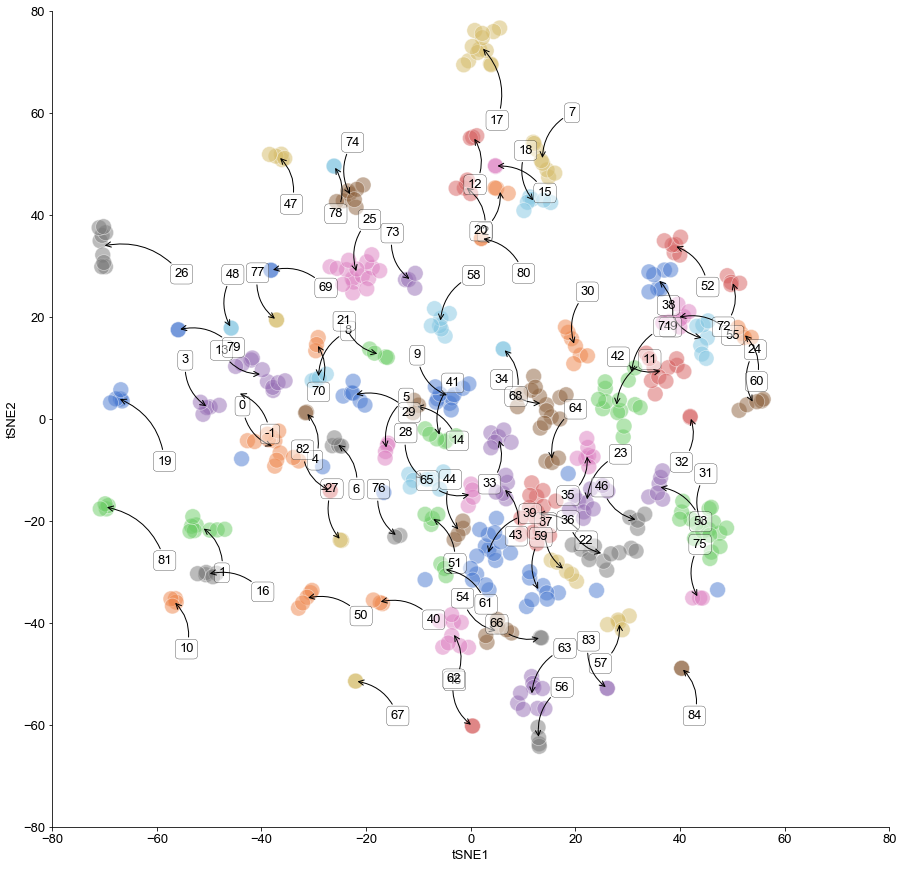

In [20]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['font.size']=13

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())


sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=250,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))),
                alpha=0.5
               )

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,25,5)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    if plot_data_filtered.shape[0]<2:
        continue
    s=label
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        
        if abs(xytext[0])>60 or abs(xytext[1])>60:
            continue

        plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
        text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
        break

#plt.xticks([])
#plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.gca().axes.get_yaxis().set_visible(False)

plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
#plt.
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)
plt.title("")
plt.xlim(-80,80)
plt.ylim(-80,80)
sns.despine()

plt.show()


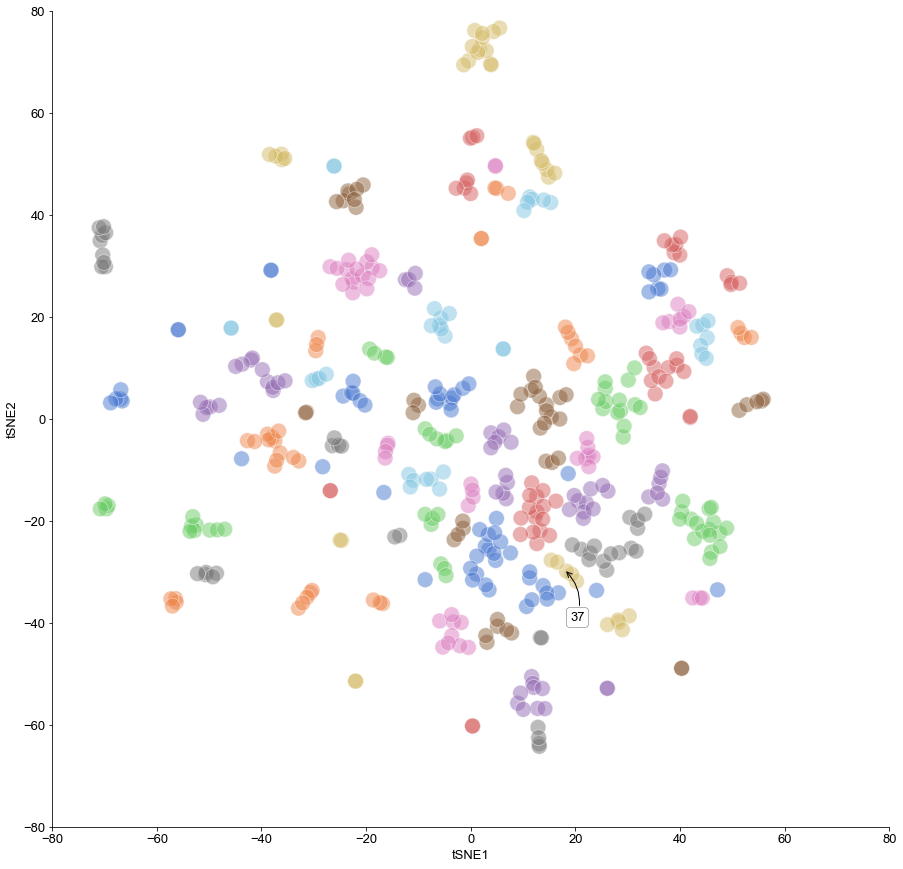

In [21]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['font.size']=13

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())


sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=250,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))),
                alpha=0.5
               )

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,25,5)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    if label!=37:
        continue
    plot_data_filtered=plot_data[plot_data['label']==label]
    if plot_data_filtered.shape[0]<2:
        continue
    s=label
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        
        if abs(xytext[0])>60 or abs(xytext[1])>60:
            continue

        plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
        text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
        break

#plt.xticks([])
#plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.gca().axes.get_yaxis().set_visible(False)

plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
#plt.
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)
plt.title("")
plt.xlim(-80,80)
plt.ylim(-80,80)
sns.despine()

plt.show()


In [64]:
plot_data.to_pickle("plot_data(7_5_pca_ipynb).pickle")

In [86]:
plot_data[plot_data.label==31]

,x_data,y_data,label,description
0,,,,
3476,-3.807037,34.999603,31,Difficulty not smoking for 1 day
3456,-5.069435,35.326584,31,Number of cigarettes currently smoked daily (c...
3466,-6.136149,35.702782,31,Time from waking to first cigarette
6162_4,-2.521097,34.664837,31,Types of transport used (excluding work): Cycle


In [38]:
plot_data['description']=plot_data.index.map(code_to_description)
plot_data.sort_values('label')[plot_data.sort_values('label')['label']>=0]

,x_data,y_data,label,description
0,,,,
5110_irnt,2.172887,-46.078064,0,6mm asymmetry angle (left)
20002_1465,-6.142130,-47.509075,0,"Non-cancer illness code, self-reported: osteoa..."
5111_irnt,1.239180,-46.712559,0,3mm asymmetry angle (left)
2744,0.140129,-47.926365,0,Birth weight of first child
M20,1.274854,-49.873299,0,Diagnoses - main ICD10: M20 Acquired deformiti...
1697,-3.709886,-47.723347,0,Comparative height size at age 10
3710,2.041152,-50.966759,0,Length of menstrual cycle
50_irnt,-3.114161,-48.025463,0,Standing height
20428,-7.594319,-47.801987,0,Professional informed about anxiety


# Save data

In [75]:
plot_data['description']=plot_data.index.map(code_to_description)

In [76]:
tosave=plot_data[['description','label']]
tosave[tosave['label']!=-1].sort_values('label').to_csv('pca_result.csv')

In [83]:
tosave[tosave['label']!=-1].sort_values('label')[tosave[tosave['label']!=-1].sort_values('label').label==33]

,description,label
0,,
5087_irnt,Cylindrical power (right),33
5157_irnt,6mm asymmetry index (left),33
2217_irnt,Age started wearing glasses or contact lenses,33


# Network

In [18]:
pca_data=h2_bp8_df

pca = PCA(n_components=2)
pca_result=pca.fit_transform(pca_data)
pca_result = pd.DataFrame(pca_result,index=pca_data.index)

In [19]:
pca_result.head()

,0,1
0,,
50_irnt,-0.006327,0.004625
20153_irnt,-0.005846,0.003439
5097_irnt,-0.006796,0.002789
5098_irnt,-0.007207,0.001965
30100_irnt,0.002562,0.000535


In [20]:
dbscan=DBSCAN(eps=0.01, min_samples=3)
dbscan_result=dbscan.fit(pca_result)

In [21]:
dbscan_result.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0

In [22]:
tsne_data=pca_result

tsne = TSNE(learning_rate=100,perplexity=4)
#tsne = TSNE(learning_rate=200)
tsne_result = pd.DataFrame(tsne.fit_transform(tsne_data),index=tsne_data.index)

In [23]:
plot_data=tsne_result.copy()
plot_data.columns=['x_data','y_data']
plot_data['label']=dbscan_result.labels_

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


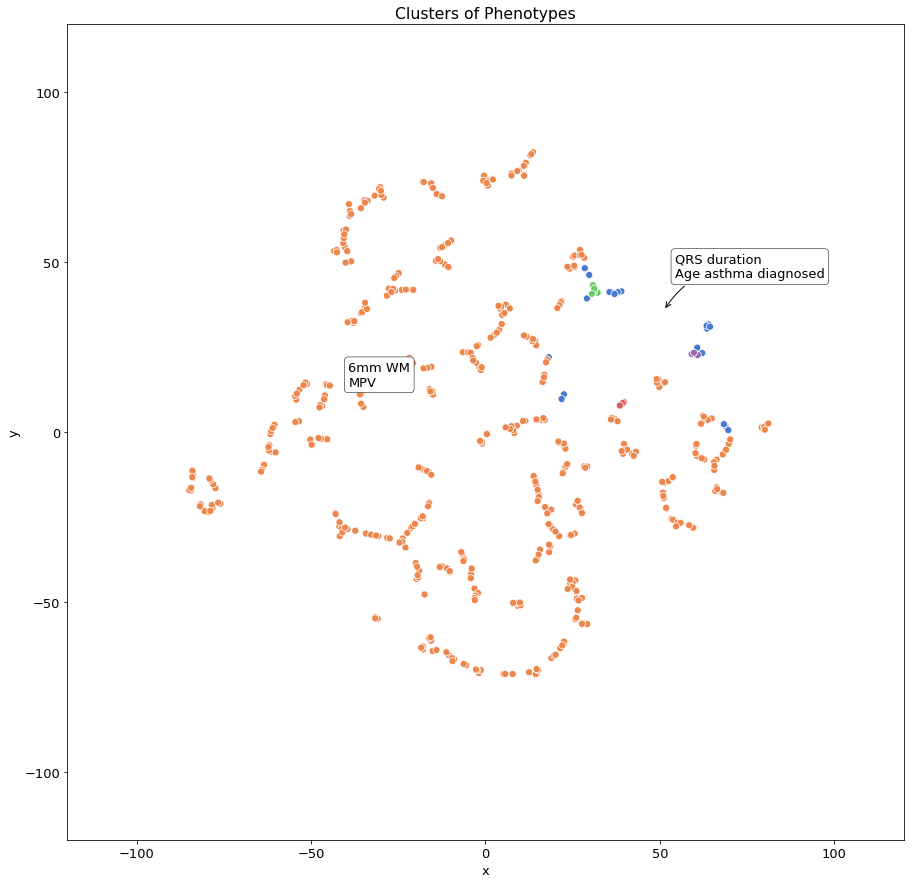

In [24]:
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['Helvetica']
plt.rcParams['font.sans-serif']  

plt.rcParams["figure.figsize"] = (15,15)

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())

plt.title("Clusters of Phenotypes")
sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=50,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,50,10)
theta_sample=2*np.pi*np.arange(0,1,1/30)


text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    plot_data_filtered['description_short']=plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub'))
    #print(index_shorten[~index_shorten.isnull()])
    plot_data_filtered=plot_data_filtered[~plot_data_filtered['description_short'].isnull()].iloc[:2]
    if plot_data_filtered.shape[0]<2:
        continue
    s=plot_data_filtered['description_short'].values
    s='\n'.join(s)
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        if text_plotted.shape[0]==0 or (((text_plotted['x']-xytext[0])**2+0.4*(text_plotted['y']-xytext[1])**2)<1000).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,1), ec="black", lw=0.5))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break


plt.xlabel("x")
plt.ylabel("y")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)

plt.xlim(-120,120)
plt.ylim(-120,120)


plt.show()